## COMP-553DL: Data Science for Bioinformatics and Medicine
## Programming Assignment 1 (Spring Semester 2025)
### Author: Ioannis Stathakis

####

### Part 1: Data Import and Cleaning

#### We will start with a simple initial exploration of the data, some cleaning and handling of issues that might arise.
#### Examples: missing values, formatting issues, some data engineering for the columns/titles, etc.

In [1]:
# Lets start by importing some initial necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lets import the dataset and create an initial dataframe
main_df = pd.read_csv("cervical+cancer+risk+factors/risk_factors_cervical_cancer.csv")
main_df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [3]:
# Some initial checks and analysis
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

####

#### We can spot some problems/discrepancies.
#### For example, some variables are assigned object types while they are numerical (number of sexual partners, number of pregnacies, and others).
#### Moreover, some binary indicators may need conversion to integer type (for example the "Smokes" variable).
#### Some missing values in the form of "?" appear to be in place.
#### We will further examine these issues as we continue.

####

In [4]:
# Lets use some conventional formatting for the column names
main_df.columns = main_df.columns.str.title()
main_df.head()

,Age,Number Of Sexual Partners,First Sexual Intercourse,Num Of Pregnancies,Smokes,Smokes (Years),Smokes (Packs/Year),Hormonal Contraceptives,Hormonal Contraceptives (Years),Iud,...,Stds: Time Since First Diagnosis,Stds: Time Since Last Diagnosis,Dx:Cancer,Dx:Cin,Dx:Hpv,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


####

### 1) Formatting Issues 
#### (for example, columns with numerical variables which are currently formatted as object)

In [5]:
# Format all columns that are stored as objects but should be numerical
for col in main_df.columns:
    # Check if the column is object type
    if main_df[col].dtype == 'object':  
        # Convert to numeric
        # The errors="coerce" line ensures that the "?" entries will not cause an error (converts them to np.nan)
        main_df[col] = pd.to_numeric(main_df[col], errors="coerce")  

In [6]:
# Check the result
main_df.dtypes

Age                                     int64
Number Of Sexual Partners             float64
First Sexual Intercourse              float64
Num Of Pregnancies                    float64
Smokes                                float64
Smokes (Years)                        float64
Smokes (Packs/Year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (Years)       float64
Iud                                   float64
Iud (Years)                           float64
Stds                                  float64
Stds (Number)                         float64
Stds:Condylomatosis                   float64
Stds:Cervical Condylomatosis          float64
Stds:Vaginal Condylomatosis           float64
Stds:Vulvo-Perineal Condylomatosis    float64
Stds:Syphilis                         float64
Stds:Pelvic Inflammatory Disease      float64
Stds:Genital Herpes                   float64
Stds:Molluscum Contagiosum            float64
Stds:Aids                         

In [7]:
# Now we need to check whether some columns preferably need to be in integer format
# For example the Number of Pregnancies, Number of Sexual Partners, etc

# The main idea on how to locate all these potential integer columns, is to print all float columns containing only whole number values
potential_integer_cols = main_df.select_dtypes(include=['float64']).columns

# Print columns where all values are whole numbers (as these can be converted to integer format)
for col in potential_integer_cols:
    # Check if all non-null values are whole numbers
    if (main_df[col].dropna() % 1 == 0).all():  
        print(col)

Number Of Sexual Partners
First Sexual Intercourse
Num Of Pregnancies
Smokes
Hormonal Contraceptives
Iud
Stds
Stds (Number)
Stds:Condylomatosis
Stds:Cervical Condylomatosis
Stds:Vaginal Condylomatosis
Stds:Vulvo-Perineal Condylomatosis
Stds:Syphilis
Stds:Pelvic Inflammatory Disease
Stds:Genital Herpes
Stds:Molluscum Contagiosum
Stds:Aids
Stds:Hiv
Stds:Hepatitis B
Stds:Hpv
Stds: Time Since First Diagnosis
Stds: Time Since Last Diagnosis


####

#### Using the data source:
https://archive.ics.uci.edu/dataset/383/cervical+cancer+risk+factors
#### We can further explore the nature of each variable in these columns, and discern whether it is in fact supposed to be in integer/boolean format.

####

In [8]:
# Convert identified float columns to integers
for col in potential_integer_cols:
    # Ensure only whole numbers exist
    if (main_df[col].dropna() % 1 == 0).all():
        # Convert to integer
        main_df[col] = main_df[col].astype("Int64")  

In [9]:
print(main_df.dtypes)

Age                                     int64
Number Of Sexual Partners               Int64
First Sexual Intercourse                Int64
Num Of Pregnancies                      Int64
Smokes                                  Int64
Smokes (Years)                        float64
Smokes (Packs/Year)                   float64
Hormonal Contraceptives                 Int64
Hormonal Contraceptives (Years)       float64
Iud                                     Int64
Iud (Years)                           float64
Stds                                    Int64
Stds (Number)                           Int64
Stds:Condylomatosis                     Int64
Stds:Cervical Condylomatosis            Int64
Stds:Vaginal Condylomatosis             Int64
Stds:Vulvo-Perineal Condylomatosis      Int64
Stds:Syphilis                           Int64
Stds:Pelvic Inflammatory Disease        Int64
Stds:Genital Herpes                     Int64
Stds:Molluscum Contagiosum              Int64
Stds:Aids                         

In [10]:
main_df.head()

,Age,Number Of Sexual Partners,First Sexual Intercourse,Num Of Pregnancies,Smokes,Smokes (Years),Smokes (Packs/Year),Hormonal Contraceptives,Hormonal Contraceptives (Years),Iud,...,Stds: Time Since First Diagnosis,Stds: Time Since Last Diagnosis,Dx:Cancer,Dx:Cin,Dx:Hpv,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0.0,0.0,0,0.0,0,...,<NA>,<NA>,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.0,0.0,0,0.0,0,...,<NA>,<NA>,0,0,0,0,0,0,0,0
2,34,1,<NA>,1,0,0.0,0.0,0,0.0,0,...,<NA>,<NA>,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37.0,37.0,1,3.0,0,...,<NA>,<NA>,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0.0,0.0,1,15.0,0,...,<NA>,<NA>,0,0,0,0,0,0,0,0


In [11]:
# At first glance, there seem to be some columns left out, while they seemingly shouldn't have been
# For example, column "Smokes (Years)" seems to be an integer column
# However, with closer examination we see that these columns actually do contain float values
# For example:
main_df[["Smokes (Years)", "Iud (Years)"]].value_counts()

Smokes (Years)  Iud (Years)
0.000000        0.00           554
                3.00            11
1.266973        0.00            11
0.000000        5.00             9
                1.00             8
                2.00             8
5.000000        0.00             7
0.000000        8.00             7
1.000000        0.00             6
2.000000        0.00             6
9.000000        0.00             6
3.000000        0.00             6
8.000000        0.00             5
7.000000        0.00             5
0.000000        7.00             5
11.000000       0.00             5
10.000000       0.00             5
4.000000        0.00             4
16.000000       0.00             4
0.000000        6.00             4
12.000000       0.00             3
6.000000        0.00             3
0.500000        0.00             3
13.000000       0.00             3
0.000000        4.00             3
15.000000       0.00             3
14.000000       0.00             3
0.000000        0.08       

###

In [12]:
# Let's also change some of the column names to make the references more consistent 
main_df.rename(columns={"Num Of Pregnancies":"Number of Pregnancies", "Iud":"IUD", "Iud (Years)":"IUD (Years)", 
                        "Stds:Aids":"Stds:AIDS", "Stds:Hiv":"Stds:HIV", "Stds:Hpv":"Stds:HPV", "Dx:Cin":"Dx:CIN", 
                        "Dx:Hpv":"Dx:HPV", "Stds: Number Of Diagnosis":"Stds:Number Of Diagnosis"}, inplace=True)
main_df.head()

,Age,Number Of Sexual Partners,First Sexual Intercourse,Number of Pregnancies,Smokes,Smokes (Years),Smokes (Packs/Year),Hormonal Contraceptives,Hormonal Contraceptives (Years),IUD,...,Stds: Time Since First Diagnosis,Stds: Time Since Last Diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0.0,0.0,0,0.0,0,...,<NA>,<NA>,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.0,0.0,0,0.0,0,...,<NA>,<NA>,0,0,0,0,0,0,0,0
2,34,1,<NA>,1,0,0.0,0.0,0,0.0,0,...,<NA>,<NA>,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37.0,37.0,1,3.0,0,...,<NA>,<NA>,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0.0,0.0,1,15.0,0,...,<NA>,<NA>,0,0,0,0,0,0,0,0


In [13]:
# Temporary file save
main_df.to_csv("formatted_cervical_cancer_data.csv", index=False, header=True)

####

#### This concludes the formatting issues handling.

####

### 2) Handling Missing Values Appropriately

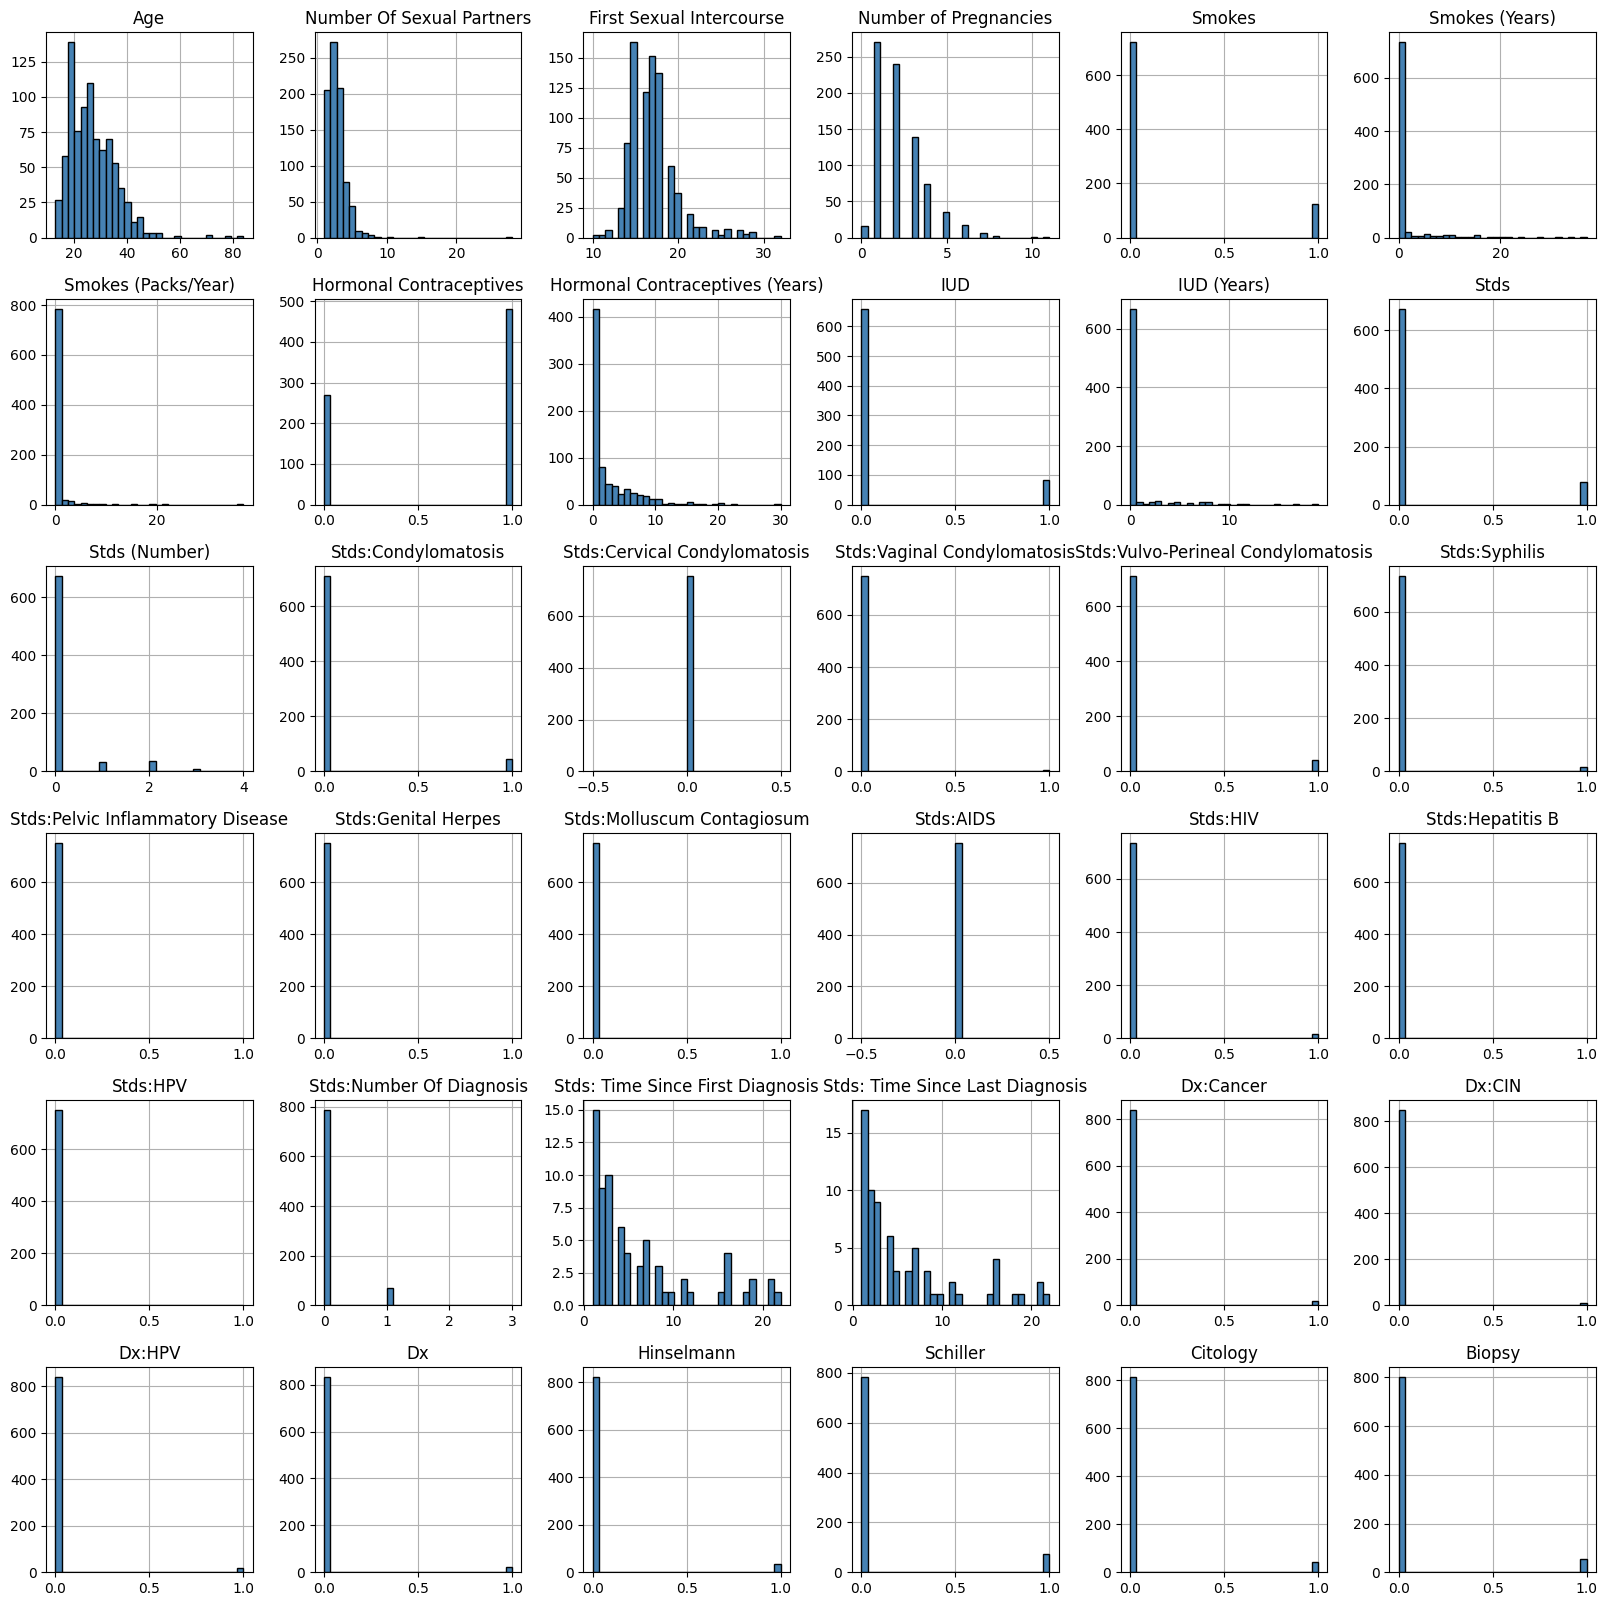

In [14]:
# Lets quickly check out the distributions of each variable, visually
# Some quick and simple histograms will help us visualize the distributions
# This way we can also quick-check for outliers or abnormalities in the values 
# (For example, features which contain negative values while they shouldn't)
main_df.hist(bins=30, figsize=(20,20), color="steelblue", edgecolor="black", zorder=2)
plt.grid(zorder=0)
plt.show()

In [15]:
# I am going to replace all "?" values and all blank entries with proper np.nan format
# This will ensure easier and proper exploration and handling of the missing values
main_df.replace(["?", " "], np.nan, inplace=True)
main_df.head()

,Age,Number Of Sexual Partners,First Sexual Intercourse,Number of Pregnancies,Smokes,Smokes (Years),Smokes (Packs/Year),Hormonal Contraceptives,Hormonal Contraceptives (Years),IUD,...,Stds: Time Since First Diagnosis,Stds: Time Since Last Diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0.0,0.0,0,0.0,0,...,<NA>,<NA>,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0.0,0.0,0,0.0,0,...,<NA>,<NA>,0,0,0,0,0,0,0,0
2,34,1,<NA>,1,0,0.0,0.0,0,0.0,0,...,<NA>,<NA>,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37.0,37.0,1,3.0,0,...,<NA>,<NA>,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0.0,0.0,1,15.0,0,...,<NA>,<NA>,0,0,0,0,0,0,0,0


In [16]:
# Count missing values and calculate percentages
missing_info = main_df.isnull().sum().to_frame(name='Missing Count')
missing_info['% Missing'] = (missing_info['Missing Count'] / len(main_df)) * 100

# Show only columns with missing values
missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='% Missing', ascending=False)
print(missing_info)

                                    Missing Count  % Missing
Stds: Time Since First Diagnosis              787  91.724942
Stds: Time Since Last Diagnosis               787  91.724942
IUD (Years)                                   117  13.636364
IUD                                           117  13.636364
Hormonal Contraceptives                       108  12.587413
Hormonal Contraceptives (Years)               108  12.587413
Stds (Number)                                 105  12.237762
Stds                                          105  12.237762
Stds:Vulvo-Perineal Condylomatosis            105  12.237762
Stds:Vaginal Condylomatosis                   105  12.237762
Stds:Pelvic Inflammatory Disease              105  12.237762
Stds:Syphilis                                 105  12.237762
Stds:Genital Herpes                           105  12.237762
Stds:Molluscum Contagiosum                    105  12.237762
Stds:HIV                                      105  12.237762
Stds:AIDS               

####

#### Now we can start thinking of the best action to take for every different missing value set
#### For example, in the column "Number of Sexual Partners", we cannot fill the missing values using the mean
#### (The feature is ordinal/ratio but the mean is senseless here, its much better to fill with the mode or the median)

#### The first necessary step is, in my opinion, to check out the distributions of all of these features which contain missing values
#### This way we can see whether we have skewed distributions, for example, which is a sign that the mean is not the most appropriate to use


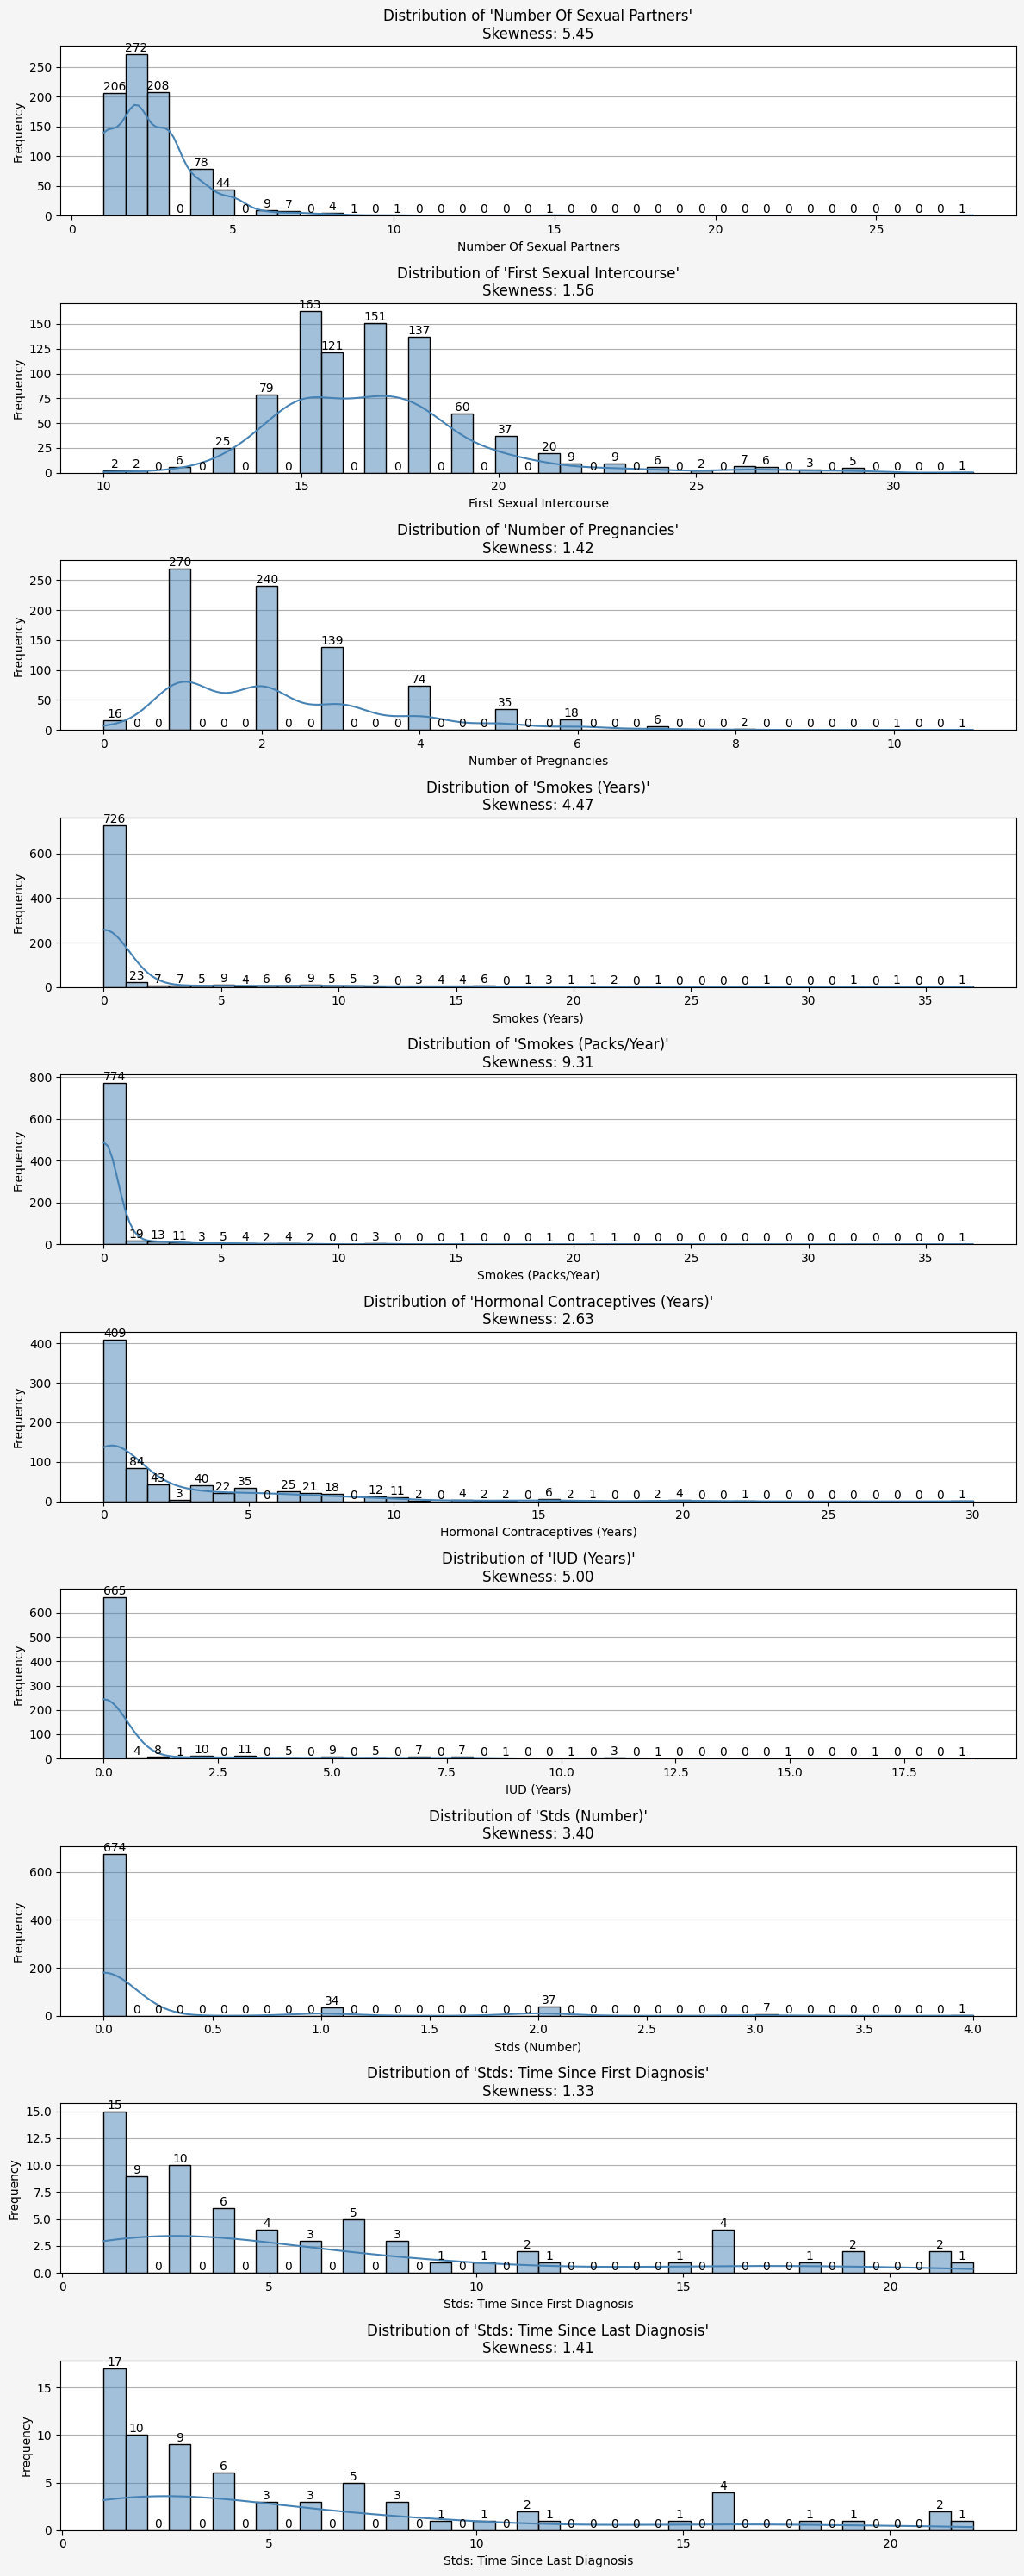

In [17]:
# This is to quickly identify all the column with missing values
# This way I don't have to copy and paste every column we discovered above manually
missing_columns = main_df.columns[main_df.isnull().any()].tolist()

# Exclude binary columns (those with only two unique non-null values)
# Distribution and Skewness is non-sensical for these columns
# I will use the Mode for imputing missing values in the binary columns I will keep
non_binary_missing_columns = [col for col in missing_columns if main_df[col].dropna().nunique() > 2]

# Set up the figure size dynamically based on the number of non-binary columns
plt.figure(figsize=(12, len(non_binary_missing_columns) * 3), facecolor="whitesmoke")

# Loop through each non-binary column with missing values and plot a histogram
for i, col in enumerate(non_binary_missing_columns, 1):
    plt.subplot(len(non_binary_missing_columns), 1, i)
    ax = sns.histplot(main_df[col], bins=40, kde=True, color="steelblue", zorder=2)

    # Annotate bars with counts
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

    # Title for each subplot
    plt.title(f"Distribution of '{col}'\nSkewness: {main_df[col].skew():.2f}") # This is to identify Skewness for each feature
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis="y", zorder=0)

# Adjust layout for better spacing
plt.tight_layout()
# Show the plots
plt.show()


####

In [18]:
# Now lets also take a look at the composition of the binary features
# Lets check out how imbalanced each one of them really is
# I will calculate and print the total percentage of each subclass, and also the percentage of missing values for each feature

# Identify binary columns (columns with only 0s and 1s)
# I will include columns with no missing values as well
# This way I will be able to chack out the class distribution for these columns as well
binary_cols = [col for col in main_df.columns if main_df[col].dropna().nunique() == 2]

# Print class distribution and missing value percentage for each binary column
for col in binary_cols:
    total_count = len(main_df[col])
    missing_count = main_df[col].isnull().sum()
     # Calculate missing percentage:
    missing_percentage = (missing_count / total_count) * 100 
     # Get class distribution in percentage:
    value_counts = main_df[col].value_counts(normalize=True) * 100 

    print(f"{col}:")
    # Print percentage of 0s:
    print(f" - 0s: {value_counts.get(0, 0):.2f}%")
    # Print percentage of 1s:
    print(f" - 1s: {value_counts.get(1, 0):.2f}%")  
    print(f" - Missing Values: {missing_percentage:.2f}%")
    print("-" * 35)

Smokes:
 - 0s: 85.44%
 - 1s: 14.56%
 - Missing Values: 1.52%
-----------------------------------
Hormonal Contraceptives:
 - 0s: 35.87%
 - 1s: 64.13%
 - Missing Values: 12.59%
-----------------------------------
IUD:
 - 0s: 88.80%
 - 1s: 11.20%
 - Missing Values: 13.64%
-----------------------------------
Stds:
 - 0s: 89.51%
 - 1s: 10.49%
 - Missing Values: 12.24%
-----------------------------------
Stds:Condylomatosis:
 - 0s: 94.16%
 - 1s: 5.84%
 - Missing Values: 12.24%
-----------------------------------
Stds:Vaginal Condylomatosis:
 - 0s: 99.47%
 - 1s: 0.53%
 - Missing Values: 12.24%
-----------------------------------
Stds:Vulvo-Perineal Condylomatosis:
 - 0s: 94.29%
 - 1s: 5.71%
 - Missing Values: 12.24%
-----------------------------------
Stds:Syphilis:
 - 0s: 97.61%
 - 1s: 2.39%
 - Missing Values: 12.24%
-----------------------------------
Stds:Pelvic Inflammatory Disease:
 - 0s: 99.87%
 - 1s: 0.13%
 - Missing Values: 12.24%
-----------------------------------
Stds:Genital Herp

#### We can actually notice many characteristics and also some problems:
#### 1) There are binary features which are extremely imbalanced, to the point that they are probably unusable.
#### 2) There are also binary features which only contain entries belonging to only one class (total imbalance).
#### 3) There are features which are not normally distributed, but more or less skewed, so for these we are going to use the median.
#### 4) There are features which contain missing values to an extreme ratio with the present entries, so probably I am going to discard these.
#### 5) There are also features which appear multimodal and features with outliers, for which the median will also be a more sensitive choice.

####

#### Before we continue with the missing values handling decisions, there is one more necessary step.
#### Lets also check for outliers, in all the non-binary numarical values, using multiple boxplots.
#### Even non-binary and non-highly skewed distributions, might need the median instead of the mean as imputation method, if data is extreme.

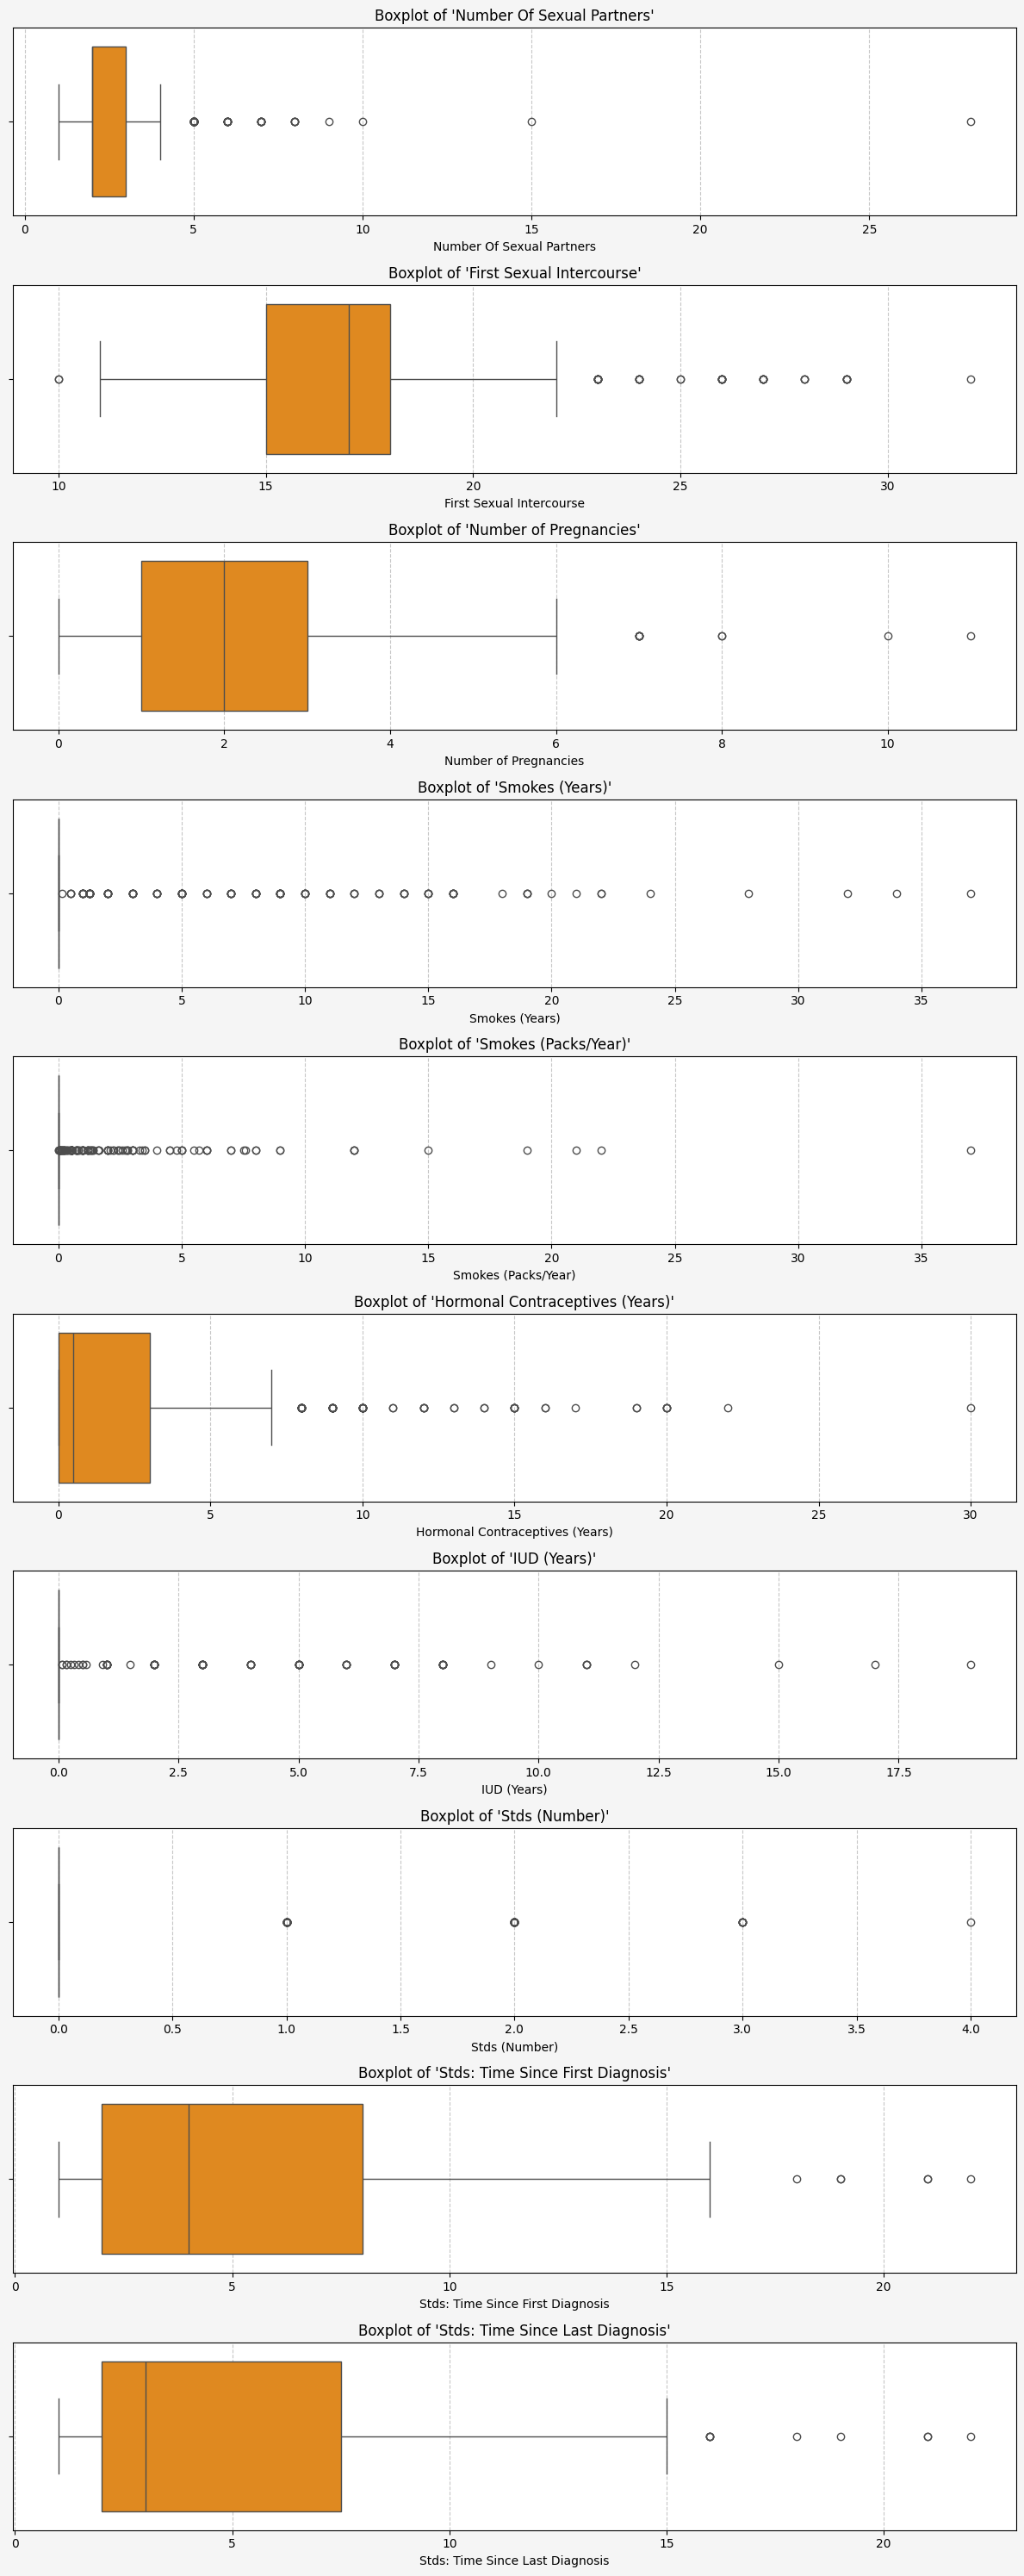

In [19]:
# Using the previous approach:
# Identify columns with missing values
missing_columns = main_df.columns[main_df.isnull().any()].tolist()

# Filter non-binary numerical features only
non_binary_columns = [col for col in missing_columns if main_df[col].dropna().nunique() > 2]

# Set up figure
plt.figure(figsize=(12, len(non_binary_columns) * 3), facecolor="whitesmoke")

# Create boxplots for each column
for i, col in enumerate(non_binary_columns, 1):
    plt.subplot(len(non_binary_columns), 1, i)
    sns.boxplot(x=main_df[col], color='darkorange')
    plt.title(f"Boxplot of '{col}'")
    plt.xlabel(col)
    plt.grid(axis="x", linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


####

#### There seem to be many outliers in some of the features. 
#### Lets take a close look at the outlier percentage for each of these columns, before we can make a final imputing method decision.

In [20]:
# Once again following the previous approaches for these columns
# Get columns with missing values and more than 2 unique values (non-binary)
missing_columns = main_df.columns[main_df.isnull().any()].tolist()
non_binary_columns = [col for col in missing_columns if main_df[col].dropna().nunique() > 2]

# Initialize a dictionary to store outlier percentages
outlier_summary = {}

# Calculate outlier percentage for each column
for col in non_binary_columns:
    series = main_df[col].dropna()  # Remove NaNs temporarily
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = series[(series < lower_bound) | (series > upper_bound)]
    outlier_percentage = (len(outliers) / len(series)) * 100

    outlier_summary[col] = round(outlier_percentage, 2)

# Display sorted result
outlier_summary = dict(sorted(outlier_summary.items(), key=lambda item: item[1], reverse=True))

# Print results
for col, perc in outlier_summary.items():
    print(f"{col}: {perc}% outliers")


Smokes (Years): 14.56% outliers
Smokes (Packs/Year): 14.56% outliers
Stds: Time Since Last Diagnosis: 12.68% outliers
IUD (Years): 11.2% outliers
Stds (Number): 10.49% outliers
Hormonal Contraceptives (Years): 9.07% outliers
Stds: Time Since First Diagnosis: 8.45% outliers
Number Of Sexual Partners: 8.17% outliers
First Sexual Intercourse: 4.82% outliers
Number of Pregnancies: 1.25% outliers


####

#### One last check in order to make the most informed decision about missing values handling.
#### I will calculate the expected rows to be dropped, if for some cases, we choose to keep the column but only drop the rows of the missing values.

In [21]:
# Preview potential data loss from dropping rows with NaNs per column
for col in main_df.columns[main_df.isnull().any()]:
    missing_rows = main_df[col].isnull().sum()
    percent = (missing_rows / len(main_df)) * 100
    print(f"'{col}': {missing_rows} rows would be dropped ({percent:.2f}%)")


'Number Of Sexual Partners': 26 rows would be dropped (3.03%)
'First Sexual Intercourse': 7 rows would be dropped (0.82%)
'Number of Pregnancies': 56 rows would be dropped (6.53%)
'Smokes': 13 rows would be dropped (1.52%)
'Smokes (Years)': 13 rows would be dropped (1.52%)
'Smokes (Packs/Year)': 13 rows would be dropped (1.52%)
'Hormonal Contraceptives': 108 rows would be dropped (12.59%)
'Hormonal Contraceptives (Years)': 108 rows would be dropped (12.59%)
'IUD': 117 rows would be dropped (13.64%)
'IUD (Years)': 117 rows would be dropped (13.64%)
'Stds': 105 rows would be dropped (12.24%)
'Stds (Number)': 105 rows would be dropped (12.24%)
'Stds:Condylomatosis': 105 rows would be dropped (12.24%)
'Stds:Cervical Condylomatosis': 105 rows would be dropped (12.24%)
'Stds:Vaginal Condylomatosis': 105 rows would be dropped (12.24%)
'Stds:Vulvo-Perineal Condylomatosis': 105 rows would be dropped (12.24%)
'Stds:Syphilis': 105 rows would be dropped (12.24%)
'Stds:Pelvic Inflammatory Disease':

####

#### Taking into account all the above information and analysis, we can now decide on the most appropriate handling of the missing values in each column.
#### I will briefly describe the thinking behind the decisions, but the more specific reasoning for each choise will be explained in the report.
#### For now, I will create separate column lists depending on the handling I have decided for each.

####

In [22]:
# I will not use the mean for any imputation, but only the median and mode
# This is so, because the mean doesn't seem appropriate for any of these specific features:
# They are either highly skewed, or with a sizeable outlier percentage, or binary/with low class numbers
# Also, the mean in some cases will be non-sensical due to the integer nature of the variable (for example "Number of Pregnancies")

# These will be the columns which will be imputed using the Median
impute_with_median = ["Number Of Sexual Partners", "First Sexual Intercourse", "Number of Pregnancies",
                      "Smokes (Years)", "Smokes (Packs/Year)", "Hormonal Contraceptives (Years)", "IUD (Years)",
                      "Stds (Number)"]

# These will be the columns for which I will use the Mode
impute_with_mode = ["Smokes", "Hormonal Contraceptives", "IUD", "Stds", "Stds:Condylomatosis", "Stds:Vulvo-Perineal Condylomatosis"]

# And these will be the columns which I will drop
# This decision is a combination of the following factors:
# Features contain extremely high percentage of missing values (>90%)
# Features are extremely imbalanced (majority class >95%, sometimes actually 100%)
# Imputing would inflate the majority class even more
# Imputing would also involve the unwarranted assumption that "absence of data" = "absence of condition", since the mode is the "No" subclass in all of these
# They seem to be rather secondary condtributors of information, since they are all included in the "Stds" and "Stds (Number)" aggregate features
# There is no domain knowledge I could find, about any of these being statistically strong predictors of cervical cancer (Biopsy)
# They seem to be rather redundant, since we already have many "Stds" columns
# Dropping these will reduce imbalance noise and reduce dimensionality
drop_columns = ["Stds:Cervical Condylomatosis", "Stds:Vaginal Condylomatosis", "Stds:Syphilis", "Stds:Pelvic Inflammatory Disease", 
                "Stds:Genital Herpes", "Stds:Molluscum Contagiosum", "Stds:AIDS", "Stds:HIV", "Stds:Hepatitis B", "Stds:HPV", 
                "Stds: Time Since First Diagnosis", "Stds: Time Since Last Diagnosis"]

In [23]:
# So lets implement these imputations and changes:
# Drop unwanted columns
main_df.drop(columns=drop_columns, inplace=True)

# Impute respective columns with median
for col in impute_with_median:
    if col in main_df.columns:
        main_df[col] = main_df[col].fillna(main_df[col].median())

# Impute respective columns with mode
for col in impute_with_mode:
    if col in main_df.columns:
        main_df[col] = main_df[col].fillna(main_df[col].mode()[0])

# Final sanity check for remaining missing values!
missing_total = main_df.isnull().sum().sum()
print(f"Cleaning complete. Remaining missing values: {missing_total}")


Cleaning complete. Remaining missing values: 0


####

#### This concludes the missing values handling.

####

### 3) Handling Potential Duplicates 

In [25]:
# Lets perform a quick check for duplicates
duplicates = main_df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 28


In [31]:
# Lets see which are the duplicates exactly
duplicate_rows = main_df[main_df.duplicated()]
duplicate_rows


,Age,Number Of Sexual Partners,First Sexual Intercourse,Number of Pregnancies,Smokes,Smokes (Years),Smokes (Packs/Year),Hormonal Contraceptives,Hormonal Contraceptives (Years),IUD,...,Stds:Vulvo-Perineal Condylomatosis,Stds:Number Of Diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
66,34,3,19,3,0,0.0,0.0,1,5.00,0,...,0,0,0,0,0,0,0,0,0,0
234,25,2,18,2,0,0.0,0.0,1,0.50,0,...,0,0,0,0,0,0,0,0,0,0
255,25,2,18,2,0,0.0,0.0,1,0.25,0,...,0,0,0,0,0,0,0,0,0,0
356,18,1,17,1,0,0.0,0.0,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
373,23,2,19,2,0,0.0,0.0,1,0.50,0,...,0,0,0,0,0,0,0,0,0,0
395,18,1,18,1,0,0.0,0.0,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
406,17,1,17,1,0,0.0,0.0,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0
408,17,2,15,2,0,0.0,0.0,1,0.50,0,...,0,0,0,0,0,0,0,0,0,0
419,19,4,14,1,0,0.0,0.0,1,0.50,0,...,0,0,0,0,0,0,0,0,0,0
431,18,1,14,2,0,0.0,0.0,0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Lets drop the duplicates
main_df.drop_duplicates(inplace=True)

# A final confirmation:
print(f"Remaining duplicates: {main_df.duplicated().sum()}")
print(f"New dataset shape: {main_df.shape}")


Remaining duplicates: 0
New dataset shape: (830, 24)


####

#### This concludes the duplicates handling.

####

### 4) Check for Invalid/Extreme Values

In [34]:
# Lets check for various potential anomalies, for example check for negative ages, or suspiciously high values
main_df.describe()

,Age,Number Of Sexual Partners,First Sexual Intercourse,Number of Pregnancies,Smokes,Smokes (Years),Smokes (Packs/Year),Hormonal Contraceptives,Hormonal Contraceptives (Years),IUD,...,Stds:Vulvo-Perineal Condylomatosis,Stds:Number Of Diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,830.000000,830.0,830.0,830.0,830.0,830.000000,830.000000,830.0,830.000000,830.0,...,830.0,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,27.069880,2.539759,17.025301,2.287952,0.148193,1.241765,0.461333,0.693976,2.090644,0.1,...,0.051807,0.090361,0.021687,0.010843,0.021687,0.028916,0.042169,0.087952,0.051807,0.065060
std,8.485135,1.657744,2.8097,1.410874,0.355505,4.122522,2.245822,0.461118,3.609802,0.300181,...,0.221771,0.307178,0.145746,0.103628,0.145746,0.167671,0.201095,0.283396,0.221771,0.246781
min,13.000000,1.0,10.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.0,15.0,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.0,17.0,2.0,0.0,0.000000,0.000000,1.0,0.500000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.0,18.0,3.0,0.0,0.000000,0.000000,1.0,3.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.0,32.0,11.0,1.0,37.000000,37.000000,1.0,30.000000,1.0,...,1.0,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


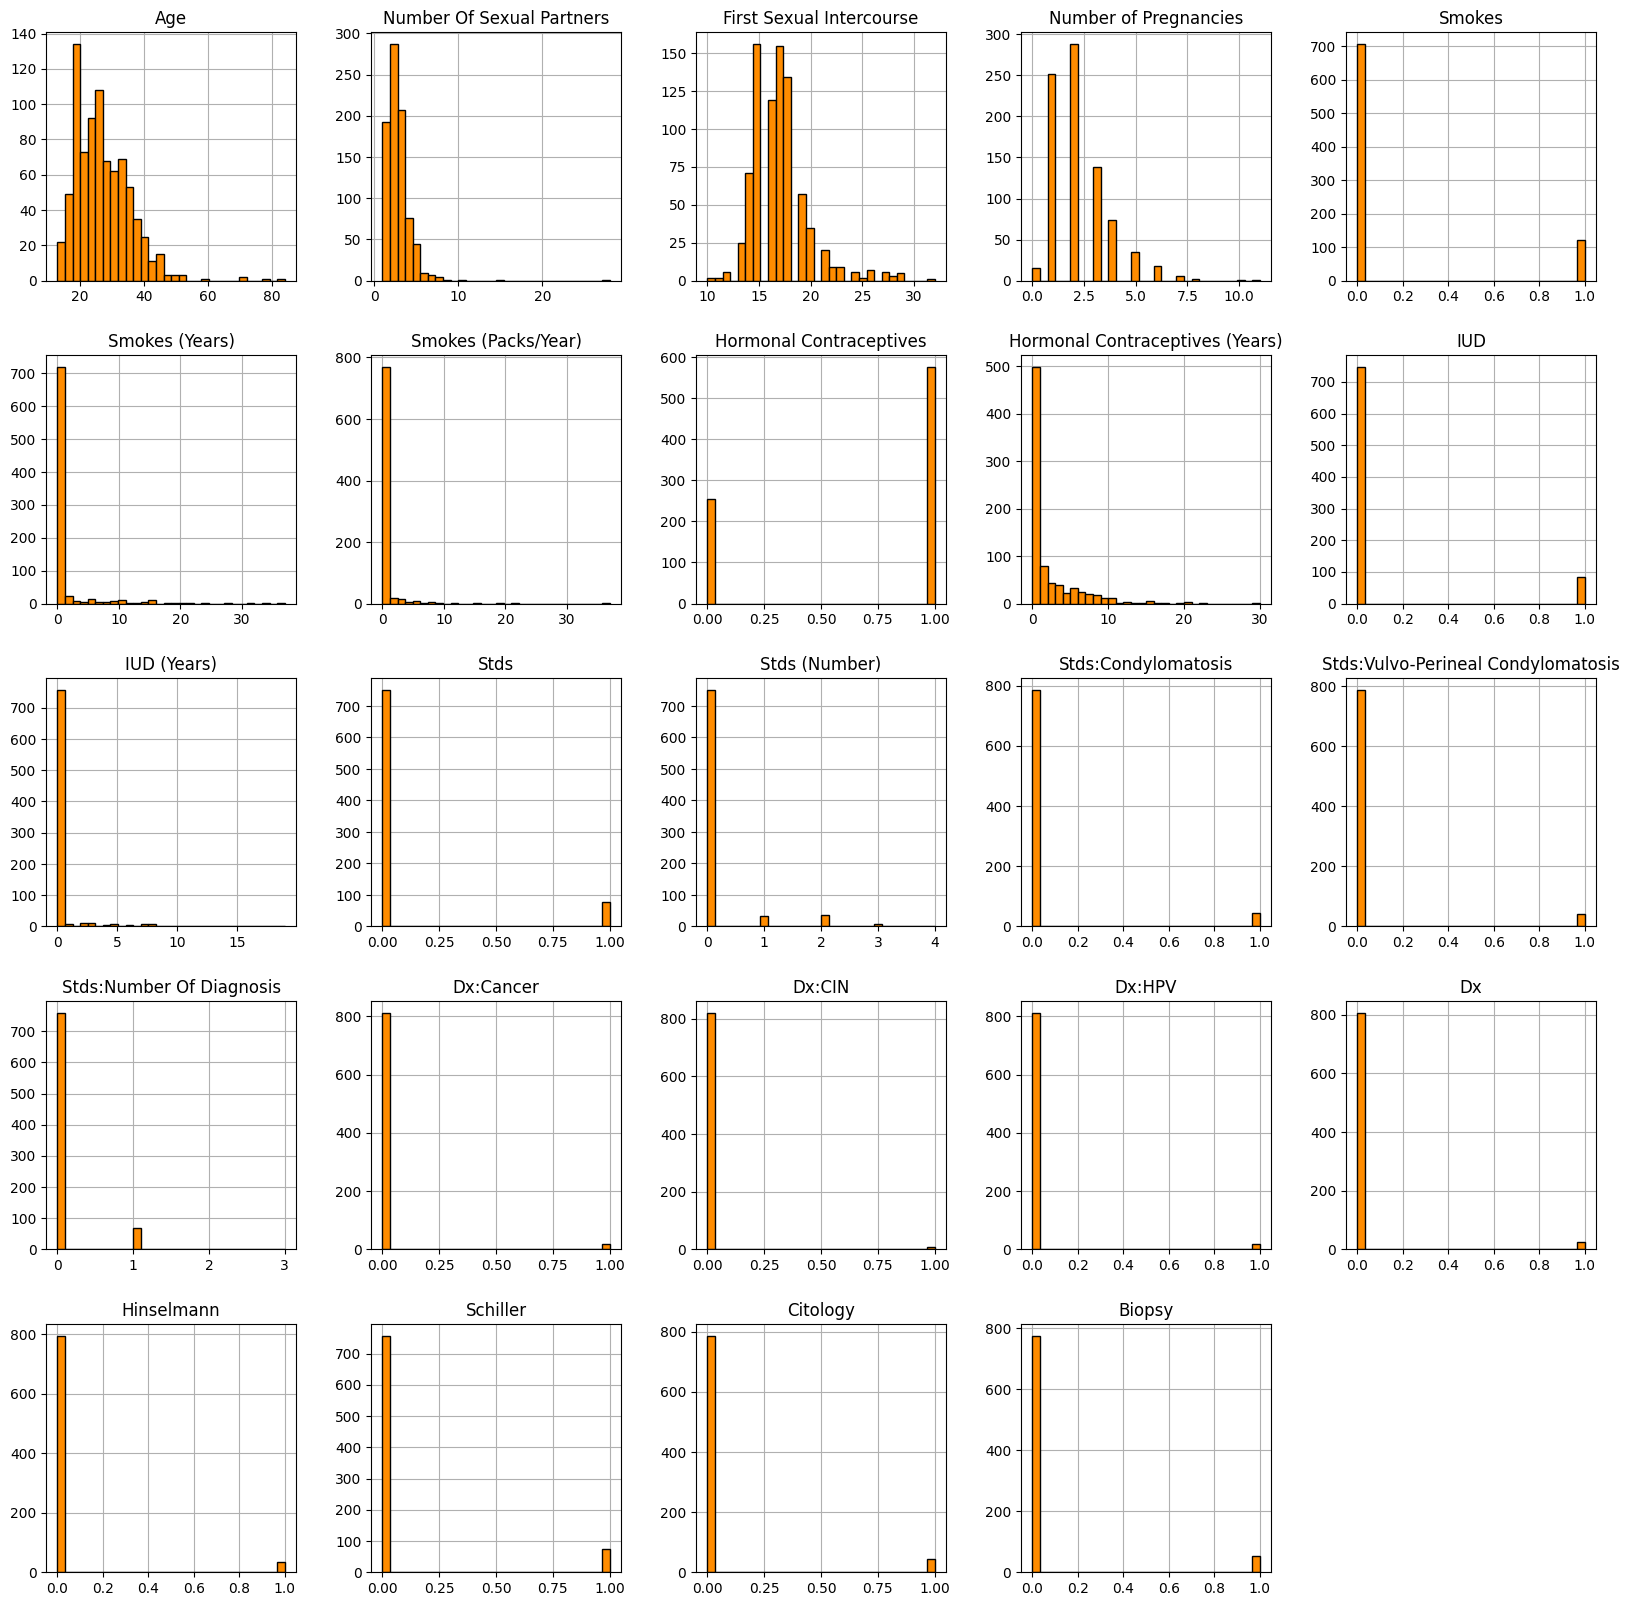

In [35]:
# We can also use the histogram approach for this task, like earlier in this notebook
main_df.hist(bins=30, figsize=(20,20), color="darkorange", edgecolor="black", zorder=2)
plt.grid(zorder=0)
plt.show()

####

#### There doesn't seem to be any problem in the values, so this task can be concluded as well.
#### lets save the cleaned dataset to be used in the next EDA step.

####

In [36]:
# Save the dataset and confirm
main_df.to_csv("cleaned_cervical_cancer_data.csv", index=False)
print("Dataset saved as 'cleaned_cervical_cancer_data.csv'")


Dataset saved as 'cleaned_cervical_cancer_data.csv'
